<a href="https://colab.research.google.com/github/obeabi/RegressionNN/blob/main/InvestmentEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import time
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
print("libraries installed")

libraries installed


In [66]:
ticker = 'SPY'
df = yf.download(ticker, interval="1mo", start="1980-12-12" )
#df = yf.download(ticker, interval="1mo", start="1980-12-12" , end="2019-12-31")

# Remove the last row (incomplete current month)
df = df.iloc[:-1]

# Ensure the data is sorted by date
df = df.sort_index()
# Calculate the MoM returns
df['MoM_Returns'] = df['Adj Close'].pct_change() * 100

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MoM_Returns
Date,,,,,,,
1993-02-01,43.96875,45.12500,42.81250,44.40625,24.947447,5417600,NaN
1993-03-01,44.56250,45.84375,44.21875,45.18750,25.386354,3019200,1.759329
1993-04-01,45.25000,45.25000,43.28125,44.03125,24.853605,2697200,-2.098565
1993-05-01,44.09375,45.65625,43.84375,45.21875,25.523895,1808000,2.696953
1993-06-01,45.37500,45.81250,44.21875,45.06250,25.435692,3438000,-0.345572


## Create new faetures and perform the averaging

In [67]:
# Create Month and Year columns
data = df.copy()
data['Month'] = data.index.month_name()
data['Year'] = data.index.year

data.head()

,Open,High,Low,Close,Adj Close,Volume,MoM_Returns,Month,Year
Date,,,,,,,,,
1993-02-01,43.96875,45.12500,42.81250,44.40625,24.947447,5417600,NaN,February,1993
1993-03-01,44.56250,45.84375,44.21875,45.18750,25.386354,3019200,1.759329,March,1993
1993-04-01,45.25000,45.25000,43.28125,44.03125,24.853605,2697200,-2.098565,April,1993
1993-05-01,44.09375,45.65625,43.84375,45.21875,25.523895,1808000,2.696953,May,1993
1993-06-01,45.37500,45.81250,44.21875,45.06250,25.435692,3438000,-0.345572,June,1993


In [77]:
# Group by Month and calculate average and median returns
monthly_avg_returns = data.groupby('Month')['MoM_Returns'].mean().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))
monthly_median_returns = data.groupby('Month')['MoM_Returns'].median().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))
# Calculate the 75th percentile monthly returns
monthly_75th_percentile_returns = data.groupby('Month')['MoM_Returns'].quantile(0.75).sort_index(key=lambda x: pd.to_datetime(x, format='%B'))

# Calculate the 25th percentile monthly returns
monthly_25th_percentile_returns = data.groupby('Month')['MoM_Returns'].quantile(0.25).sort_index(key=lambda x: pd.to_datetime(x, format='%B'))


## Visualize the peformance

<ipython-input-78-0dd1c25187c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_avg = sns.barplot(x=monthly_25th_percentile_returns.index, y=monthly_25th_percentile_returns.values, palette='coolwarm')


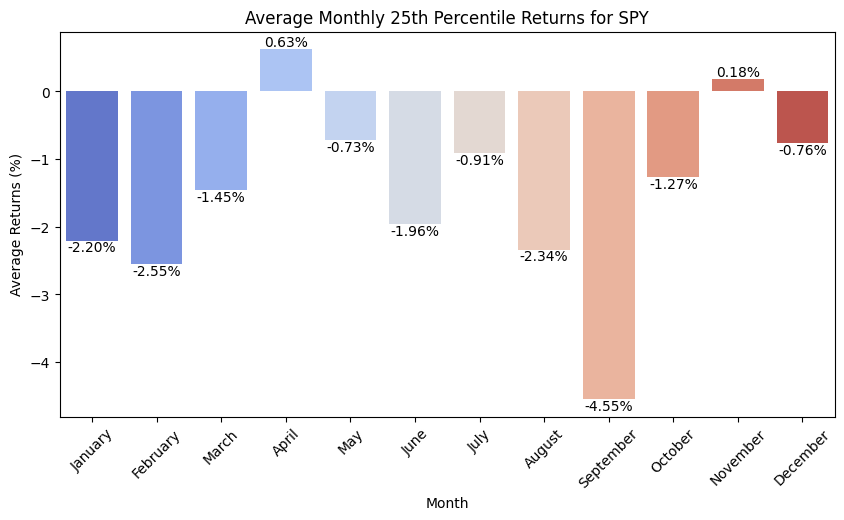

In [78]:
# Plotting average returns
plt.figure(figsize=(10, 5))
ax_avg = sns.barplot(x=monthly_25th_percentile_returns.index, y=monthly_25th_percentile_returns.values, palette='coolwarm')
#sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')
plt.title(f'Average Monthly 25th Percentile Returns for {ticker}')
plt.ylabel('Average Returns (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_avg.containers:
    ax_avg.bar_label(i, fmt='%.2f%%')

plt.show()

<ipython-input-69-4d23bfcb01a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_avg = sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')


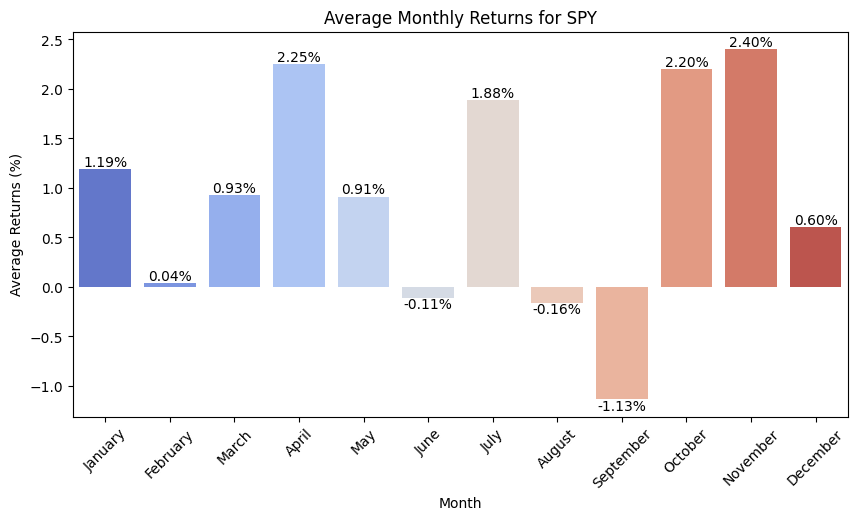

In [69]:
# Plotting average returns
plt.figure(figsize=(10, 5))
ax_avg = sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')
#sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')
plt.title(f'Average Monthly Returns for {ticker}')
plt.ylabel('Average Returns (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_avg.containers:
    ax_avg.bar_label(i, fmt='%.2f%%')

plt.show()

<ipython-input-70-95e07e06d01a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_median = sns.barplot(x=monthly_median_returns.index, y=monthly_median_returns.values, palette='coolwarm')


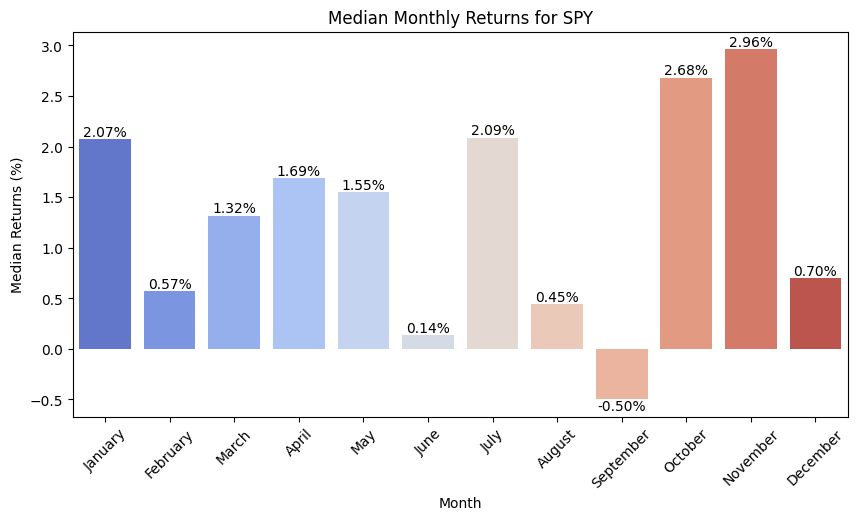

In [70]:
# Plotting median returns with labels
plt.figure(figsize=(10, 5))
ax_median = sns.barplot(x=monthly_median_returns.index, y=monthly_median_returns.values, palette='coolwarm')
plt.title(f'Median Monthly Returns for {ticker}')
plt.ylabel('Median Returns (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_median.containers:
    ax_median.bar_label(i, fmt='%.2f%%')

plt.show()

<ipython-input-79-daa72e636e52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_avg = sns.barplot(x=monthly_75th_percentile_returns.index, y=monthly_75th_percentile_returns.values, palette='coolwarm')


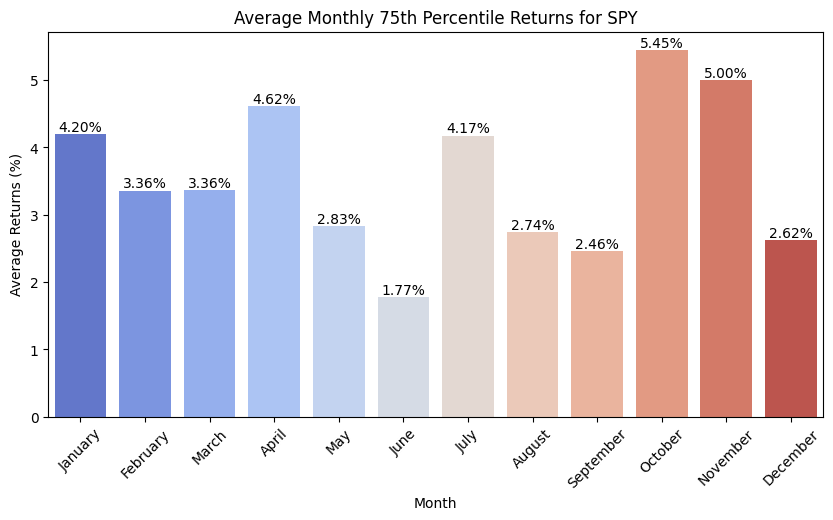

In [79]:
# Plotting average returns
plt.figure(figsize=(10, 5))
ax_avg = sns.barplot(x=monthly_75th_percentile_returns.index, y=monthly_75th_percentile_returns.values, palette='coolwarm')
#sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')
plt.title(f'Average Monthly 75th Percentile Returns for {ticker}')
plt.ylabel('Average Returns (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_avg.containers:
    ax_avg.bar_label(i, fmt='%.2f%%')

plt.show()

# To determine if September's performance is statistically significantly different from the other months

In [71]:
# Separate August and September returns
august_returns = data[data['Month'] == 'August']['MoM_Returns'].dropna()
september_returns = data[data['Month'] == 'September']['MoM_Returns'].dropna()

# Calculate the mean returns for all other months excluding August and September
other_months_returns = data[(data['Month'] != 'August') & (data['Month'] != 'September')]['MoM_Returns'].dropna()

# Perform a one-sample t-test for August
t_stat_august, p_value_august = stats.ttest_1samp(august_returns, other_months_returns.mean())

# Perform a one-sample t-test for September
t_stat_september, p_value_september = stats.ttest_1samp(september_returns, other_months_returns.mean())

# Display the results
print(f"August Average Return (Up to 2019): {august_returns.mean():.2f}%")
print(f"Other Months' Average Return (Excluding Aug & Sep) (Up to 2019): {other_months_returns.mean():.2f}%")
print(f"August t-statistic: {t_stat_august:.2f}")
print(f"August p-value: {p_value_august:.4f}")

print("\n")

print(f"September Average Return (Up to 2019): {september_returns.mean():.2f}%")
print(f"September t-statistic: {t_stat_september:.2f}")
print(f"September p-value: {p_value_september:.4f}")

# Check if the p-values are significant at the 0.05 level
if p_value_august < 0.05:
    print("The difference in returns for August is statistically significant.")
else:
    print("The difference in returns for August is not statistically significant.")

if p_value_september < 0.05:
    print("The difference in returns for September is statistically significant.")
else:
    print("The difference in returns for September is not statistically significant.")


August Average Return (Up to 2019): -0.16%
Other Months' Average Return (Excluding Aug & Sep) (Up to 2019): 1.23%
August t-statistic: -1.77
August p-value: 0.0876


September Average Return (Up to 2019): -1.13%
September t-statistic: -2.65
September p-value: 0.0126
The difference in returns for August is not statistically significant.
The difference in returns for September is statistically significant.


August 75th Percentile Return (Up to 2019): 2.74%
September 75th Percentile Return (Up to 2019): 2.46%
Other Months' 75th Percentile Return (Excluding Aug & Sep) (Up to 2019): 3.92%

August t-statistic: -5.20
August p-value: 0.0000

September t-statistic: -5.68
September p-value: 0.0000
The difference in the 75th percentile returns for August is statistically significant.
The difference in the 75th percentile returns for September is statistically significant.


<ipython-input-74-71a6161d689b>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='75th Percentile Return (%)', data=percentiles, palette='coolwarm')


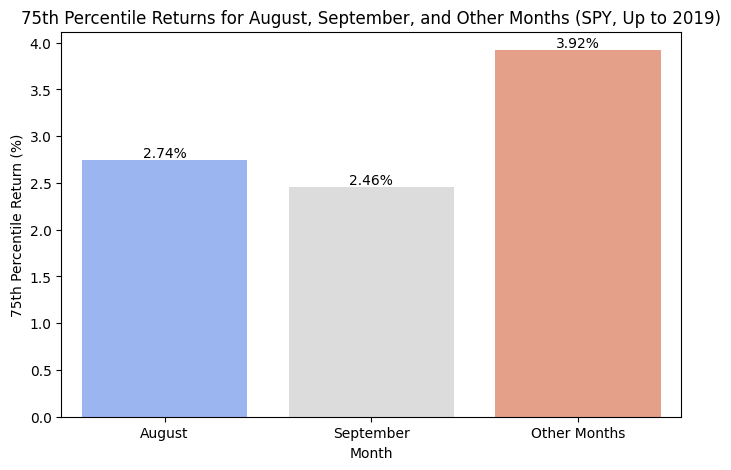

In [74]:
# Separate August and September returns
august_returns = data[data['Month'] == 'August']['MoM_Returns'].dropna()
september_returns = data[data['Month'] == 'September']['MoM_Returns'].dropna()
# Calculate the 75th percentile for August, September, and other months
august_75th = august_returns.quantile(0.75)
september_75th = september_returns.quantile(0.75)
other_months_75th = data[(data['Month'] != 'August') & (data['Month'] != 'September')]['MoM_Returns'].quantile(0.75)

# Perform a one-sample t-test for the 75th percentile
t_stat_august, p_value_august = stats.ttest_1samp(august_returns, other_months_75th)
t_stat_september, p_value_september = stats.ttest_1samp(september_returns, other_months_75th)

# Display the results
print(f"August 75th Percentile Return (Up to 2019): {august_75th:.2f}%")
print(f"September 75th Percentile Return (Up to 2019): {september_75th:.2f}%")
print(f"Other Months' 75th Percentile Return (Excluding Aug & Sep) (Up to 2019): {other_months_75th:.2f}%")

print(f"\nAugust t-statistic: {t_stat_august:.2f}")
print(f"August p-value: {p_value_august:.4f}")

print(f"\nSeptember t-statistic: {t_stat_september:.2f}")
print(f"September p-value: {p_value_september:.4f}")

# Check if the p-values are significant at the 0.05 level
if p_value_august < 0.05:
    print("The difference in the 75th percentile returns for August is statistically significant.")
else:
    print("The difference in the 75th percentile returns for August is not statistically significant.")

if p_value_september < 0.05:
    print("The difference in the 75th percentile returns for September is statistically significant.")
else:
    print("The difference in the 75th percentile returns for September is not statistically significant.")

# Plotting the 75th percentile returns
percentiles = pd.DataFrame({
    'Month': ['August', 'September', 'Other Months'],
    '75th Percentile Return (%)': [august_75th, september_75th, other_months_75th]
})

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Month', y='75th Percentile Return (%)', data=percentiles, palette='coolwarm')

# Adding labels on the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')

plt.title(f'75th Percentile Returns for August, September, and Other Months ({ticker}, Up to 2019)')
plt.ylabel('75th Percentile Return (%)')
plt.show()
